In [1]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split

In [7]:
#download data from https://decd.co/Classification - Whole Dataset
data = pd.read_csv('WholeDataset.csv')

In [8]:
data.head()

,age,gender,No_jumpers_per_year,spent_in_the_last_week,spent,salaRy,Decision
0,23,Female,10,92,327,230576.7442,NaN
1,27,Female,10,174,538,129533.2659,NaN
2,23,Female,10,230,884,213485.8351,NaN
3,32,Female,10,188,576,156576.7442,NaN
4,33,Female,10,135,384,780576.7442,NaN


In [10]:
data.shape #get dimensions of data

(701, 7)

In [12]:
data.info() # get info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 7 columns):
age                       701 non-null int64
gender                    701 non-null object
No_jumpers_per_year       701 non-null int64
spent_in_the_last_week    701 non-null int64
spent                     701 non-null int64
salaRy                    701 non-null float64
Decision                  502 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 38.4+ KB


In [13]:
data.describe()

,age,No_jumpers_per_year,spent_in_the_last_week,spent,salaRy,Decision
count,701.000000,701.000000,701.000000,701.000000,7.010000e+02,502.000000
mean,47.733238,4.748930,126.111270,419.134094,2.393763e+05,0.380478
std,22.017432,3.132733,72.473831,279.403951,2.604241e+05,0.485989
min,16.000000,0.000000,4.000000,7.000000,1.560000e+04,0.000000
25%,25.000000,2.000000,63.000000,161.000000,7.741545e+04,0.000000
50%,49.000000,5.000000,121.000000,384.000000,1.634101e+05,0.000000
75%,66.000000,7.000000,188.000000,658.000000,2.922319e+05,1.000000
max,90.000000,10.000000,250.000000,992.000000,1.820577e+06,1.000000


In [14]:
data.columns # get name of columns

Index(['age', 'gender', 'No_jumpers_per_year', 'spent_in_the_last_week',
       'spent', 'salaRy', 'Decision'],
      dtype='object')

In [16]:
#shift and tab within brackets of function gives help for autocomplete of junction in notebook
#rename column names
data.rename(columns = {"spent_in_the_last_week":"spent_week", 
                       "spent":"spent_month",
                      "salaRy":"salary"}, inplace = True)

In [18]:
data.gender.describe()

count        701
unique         6
top       female
freq         266
Name: gender, dtype: object

In [21]:
#find unique values
data.gender.unique()

array(['Female', 'Male', 'male', 'M', 'female', 'm'], dtype=object)

In [22]:
#clean data for female gender 
data['gender'] = data['gender'].replace('female','Female')

In [24]:
#clean data for multiple male data points (M/m/Male/male)
data['gender'] = data['gender'].replace(['male','M','m'],'Male')

In [25]:
data.gender.unique()

array(['Female', 'Male'], dtype=object)

In [26]:
#change decision to object from number
data['Decision'] = data['Decision'].replace(1,'yes')
data['Decision'] = data['Decision'].replace(0,'no')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 7 columns):
age                    701 non-null int64
gender                 701 non-null object
No_jumpers_per_year    701 non-null int64
spent_week             701 non-null int64
spent_month            701 non-null int64
salary                 701 non-null float64
Decision               502 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 38.4+ KB


In [27]:
#get rid of all N/A values using dropna()
NOPredict = data.dropna()
NOPredict.head(5)

,age,gender,No_jumpers_per_year,spent_week,spent_month,salary,Decision
33,66,Female,10,126,409,207338.6489,yes
34,50,Female,10,61,214,226576.7442,yes
35,81,Female,10,167,632,193148.1728,yes
36,18,Female,10,150,540,138158.1395,yes
37,68,Female,10,86,332,267961.3596,yes


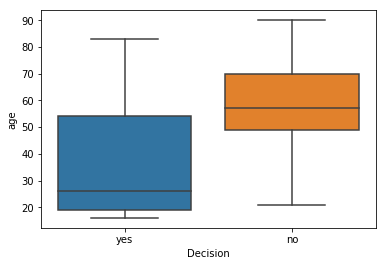

In [32]:
#look at variables against decesion to buy jumper
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(y='age',x='Decision', data=NOPredict)

In [33]:
# get all data with no decision datapoint
Predict=data[pd.isnull(data['Decision'])]
Predict.head()

,age,gender,No_jumpers_per_year,spent_week,spent_month,salary,Decision
0,23,Female,10,92,327,230576.7442,NaN
1,27,Female,10,174,538,129533.2659,NaN
2,23,Female,10,230,884,213485.8351,NaN
3,32,Female,10,188,576,156576.7442,NaN
4,33,Female,10,135,384,780576.7442,NaN


In [35]:
#Divide Nopredict into train and test datasets
#list of independent variables - no decision (dependent var)
feature_cols = ['age', 'gender', 'No_jumpers_per_year', 'spent_week',
       'spent_month', 'salary']
#define independent variables
X = NOPredict[feature_cols]
# define dependent variable
y = NOPredict.Decision

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                 #random state allows process to be replicable
                 random_state = 123)

In [40]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

Run model

In [41]:
clf = tree.DecisionTreeClassifier(criterion = "entropy", 
                                  max_depth = 5)
#run model with test data
clf.fit(X_train, y_train)
#
y_predict = clf.predict(X_test)

In [45]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.8968253968253969


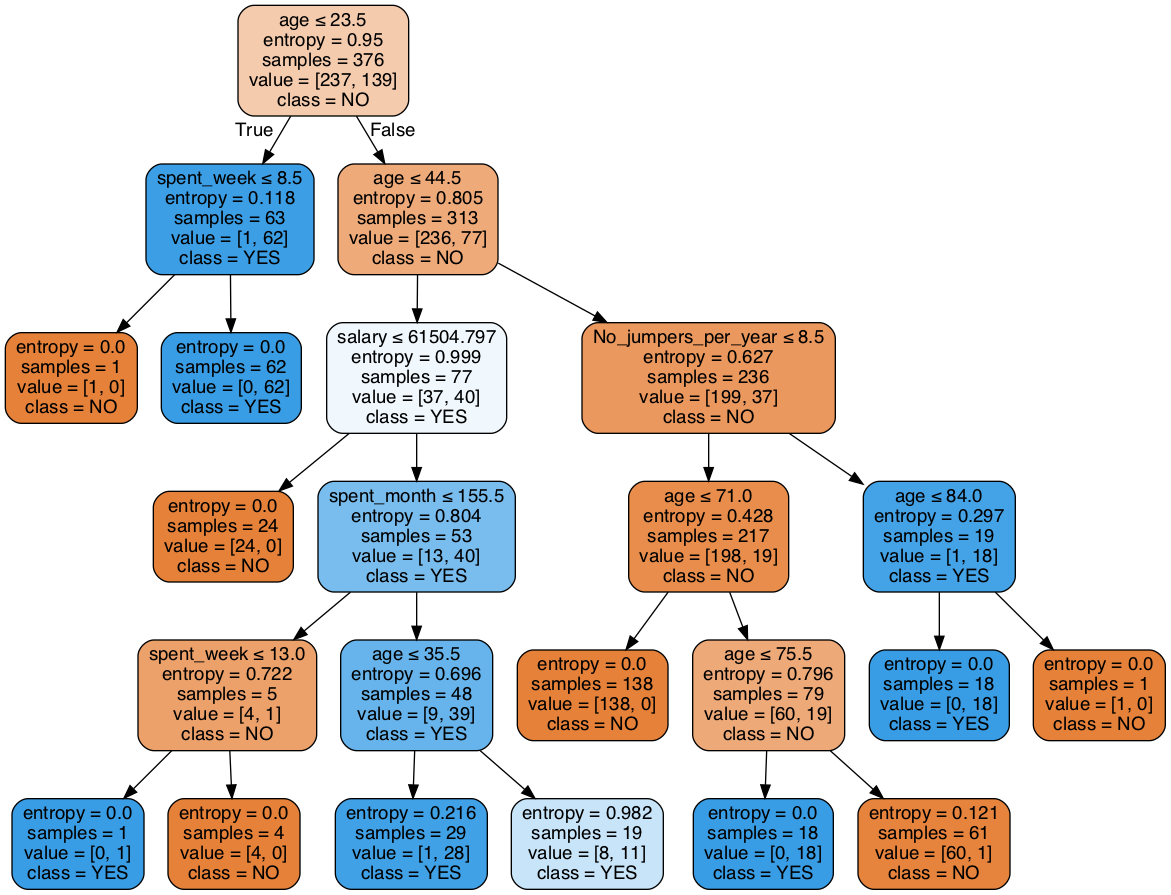

In [50]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data,
               filled = True, rounded = True,
               special_characters = True, 
                feature_names = X_train.columns,
               class_names = ['NO', 'YES'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())